In [1]:
%matplotlib inline

import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import numpy as np
from scipy.stats import linregress


In [42]:
file= Path("data/Home_inventory.monthly.csv")
inventory_df=pd.read_csv(file)



In [56]:
inventory_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
0,102001,0,United States,country,NaN,1421529.0,1500193.0,1592414.0,1660614.0,1709142.0,...,1033311.0,1092069.0,1101482.0,1085079.0,1032570.0,955889.0,884129,830977,835420,845310
1,394913,1,"New York, NY",msa,NY,73707.0,80345.0,85864.0,90067.0,91881.0,...,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916,42796,43253,44167
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16767,15382,15214,15090
3,394463,3,"Chicago, IL",msa,IL,38581.0,42253.0,45757.0,47492.0,48985.0,...,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770,20829,20922,21201
4,394514,4,"Dallas, TX",msa,TX,24043.0,25876.0,28225.0,30490.0,32408.0,...,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560,17106,17053,17942


In [48]:
ca_df=pd.DataFrame(inventory_df.loc[[2,12,17,26,35,56]])
ca_df

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16767,15382,15214,15090
12,395057,12,"San Francisco, CA",msa,CA,5326.0,6363.0,7325.0,7864.0,8146.0,...,9125.0,9379.0,9262.0,8941.0,8216.0,6901.0,5550,4868,5081,5530
17,395056,17,"San Diego, CA",msa,CA,7253.0,7992.0,8753.0,9304.0,10056.0,...,6649.0,7096.0,7053.0,6684.0,6126.0,5452.0,4808,4288,4149,4040
26,395045,26,"Sacramento, CA",msa,CA,6044.0,6678.0,7557.0,8273.0,8844.0,...,6918.0,7422.0,7517.0,7211.0,6526.0,5709.0,4891,4308,4070,4075
35,395059,36,"San Jose, CA",msa,CA,1735.0,2124.0,2522.0,2747.0,2949.0,...,3075.0,3093.0,2925.0,2637.0,2253.0,1853.0,1529,1417,1530,1687
56,394619,57,"Fresno, CA",msa,CA,2051.0,2174.0,2323.0,2424.0,2521.0,...,1988.0,2127.0,2185.0,2150.0,2023.0,1859.0,1682,1528,1437,1350


In [49]:
clean_ca_inventory=ca_df.drop(columns=["RegionID", "SizeRank", "RegionType", "StateName"])
clean_ca_inventory

,RegionName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,"Los Angeles, CA",21998.0,23784.0,25605.0,27109.0,28811.0,29874.0,30428.0,30606.0,30035.0,...,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16767,15382,15214,15090
12,"San Francisco, CA",5326.0,6363.0,7325.0,7864.0,8146.0,8162.0,8480.0,8935.0,8822.0,...,9125.0,9379.0,9262.0,8941.0,8216.0,6901.0,5550,4868,5081,5530
17,"San Diego, CA",7253.0,7992.0,8753.0,9304.0,10056.0,10529.0,10804.0,10668.0,10387.0,...,6649.0,7096.0,7053.0,6684.0,6126.0,5452.0,4808,4288,4149,4040
26,"Sacramento, CA",6044.0,6678.0,7557.0,8273.0,8844.0,9239.0,9368.0,9377.0,8871.0,...,6918.0,7422.0,7517.0,7211.0,6526.0,5709.0,4891,4308,4070,4075
35,"San Jose, CA",1735.0,2124.0,2522.0,2747.0,2949.0,3025.0,3174.0,3285.0,3196.0,...,3075.0,3093.0,2925.0,2637.0,2253.0,1853.0,1529,1417,1530,1687
56,"Fresno, CA",2051.0,2174.0,2323.0,2424.0,2521.0,2605.0,2652.0,2674.0,2600.0,...,1988.0,2127.0,2185.0,2150.0,2023.0,1859.0,1682,1528,1437,1350


In [51]:
pre_covid_df=clean_ca_inventory[["RegionName","3/31/2018", "4/30/2018", "5/31/2018", "6/30/2018", "7/31/2018", "8/31/2018",
                                "9/30/2018", "10/31/2018", "11/30/2018", "12/31/2018", "1/31/2019", "2/28/2019","3/31/2019", 
                                 "4/30/2019", "5/31/2019", "6/30/2019", "7/31/2019", "8/31/2019",
                                "9/30/2019", "10/31/2019", "11/30/2019", "12/31/2019","1/31/2020", "2/29/2020" ]]
pre_covid_df.head()

,RegionName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,...,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020
2,"Los Angeles, CA",21998.0,23784.0,25605.0,27109.0,28811.0,29874.0,30428.0,30606.0,30035.0,...,30124.0,30980.0,31524.0,31208.0,30618.0,29591.0,27588.0,24357.0,21649.0,20624.0
12,"San Francisco, CA",5326.0,6363.0,7325.0,7864.0,8146.0,8162.0,8480.0,8935.0,8822.0,...,8809.0,9291.0,9376.0,8984.0,8959.0,8992.0,8479.0,6845.0,5296.0,4945.0
17,"San Diego, CA",7253.0,7992.0,8753.0,9304.0,10056.0,10529.0,10804.0,10668.0,10387.0,...,10061.0,10356.0,10566.0,10535.0,10245.0,9841.0,9060.0,8001.0,7175.0,6853.0
26,"Sacramento, CA",6044.0,6678.0,7557.0,8273.0,8844.0,9239.0,9368.0,9377.0,8871.0,...,7890.0,8537.0,8927.0,9037.0,8991.0,8695.0,7921.0,6787.0,5910.0,5565.0
35,"San Jose, CA",1735.0,2124.0,2522.0,2747.0,2949.0,3025.0,3174.0,3285.0,3196.0,...,3376.0,3636.0,3716.0,3565.0,3434.0,3298.0,2963.0,2353.0,1827.0,1730.0


In [52]:
pre_covid=clean_ca_inventory[["3/31/2018", "6/30/2018","9/30/2018", "12/31/2018","3/31/2019", 
                                 "6/30/2019",
                                "9/30/2019", "12/31/2019", "2/29/2020" ]]


In [67]:
pre_months=pre_covid.keys()
pre_months

Index(['3/31/2018', '6/30/2018', '9/30/2018', '12/31/2018', '3/31/2019',
       '6/30/2019', '9/30/2019', '12/31/2019', '2/29/2020'],
      dtype='object')

In [65]:
average_home_pre=pre_covid[["3/31/2018", "6/30/2018","9/30/2018", "12/31/2018","3/31/2019", 
                                 "6/30/2019",
                                "9/30/2019", "12/31/2019", "2/29/2020" ]].mean()

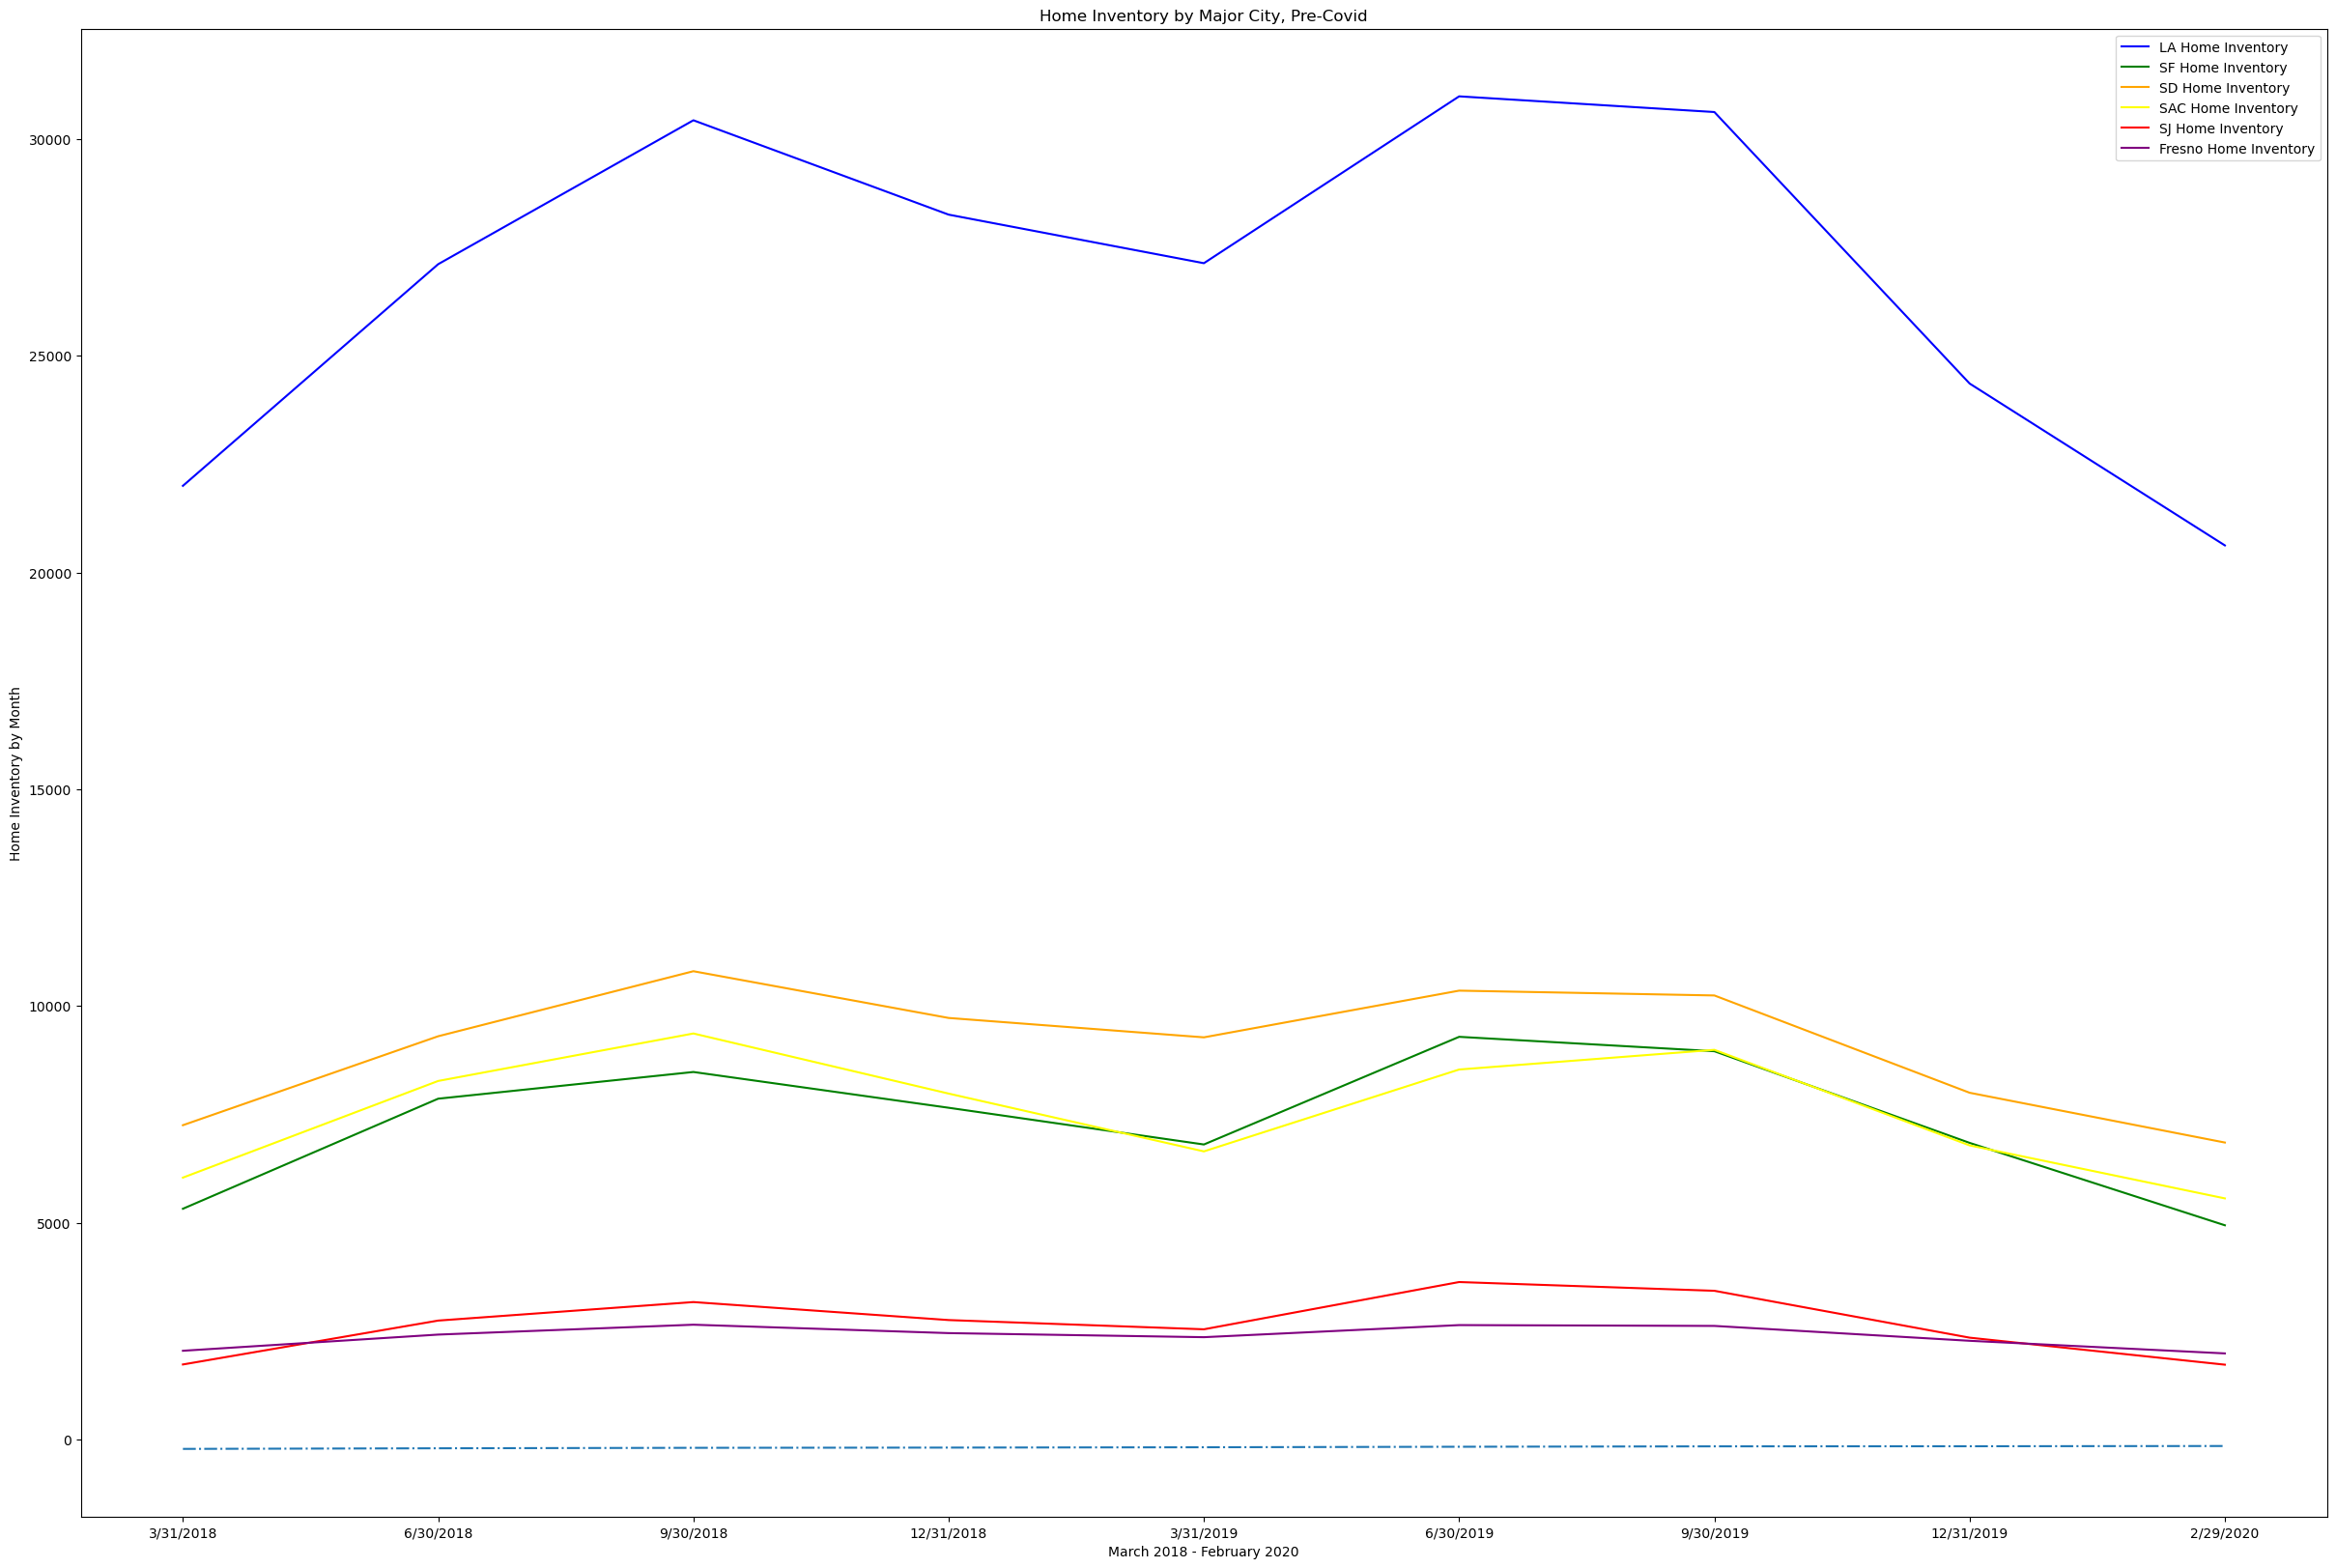

Regression Line Equation: y = 0.39x + -1091.10
Correlation Coefficient: 0.9954979582276906


In [82]:
LA=pre_covid.loc[2]
SF=pre_covid.loc[12]
SD=pre_covid.loc[17]
SAC=pre_covid.loc[26]
SJ=pre_covid.loc[35]
FRS=pre_covid.loc[56]
plt.figure(figsize=(30,20))
LA_avg=plt.plot(pre_months, LA, color='blue', label="LA Home Inventory")
SF_avg=plt.plot(pre_months, SF, color="green", label="SF Home Inventory")
SD_avg=plt.plot(pre_months, SD, color='orange', label="SD Home Inventory")
SAC_avg=plt.plot(pre_months, SAC, color='yellow', label="SAC Home Inventory")
SJ_avg=plt.plot(pre_months, SJ, color='red', label="SJ Home Inventory")
FRS_avg=plt.plot(pre_months, FRS, color='purple', label= "Fresno Home Inventory")
plt.legend()
plt.title("Home Inventory by Major City, Pre-Covid")
plt.xlabel("March 2018 - February 2020")
plt.ylabel("Home Inventory by Month")
regress_months= pre_covid.iloc[0,0:]
slope, intercept, r_value, p_value, std_err = linregress(regress_months, average_home_pre)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(3400,2783.92),fontsize=15,color="red")

regression_line = slope * regression_months + intercept
plt.plot(regression_line, linestyle='dashdot', label='Regression Line')

plt.show()
print("Regression Line Equation: y = {:.2f}x + {:.2f}".format(slope, intercept))
print("Correlation Coefficient:", r_value)


In [57]:
post_covid_df=clean_ca_inventory[["RegionName","3/31/2020", "4/30/2020", "5/31/2020", "6/30/2020", "7/31/2020", "8/31/2020",
                                "9/30/2020", "10/31/2020", "11/30/2020", "12/31/2020", "1/31/2021", "2/28/2021","3/31/2021", 
                                 "4/30/2021", "5/31/2021", "6/30/2021", "7/31/2021", "8/31/2021",
                                "9/30/2021", "10/31/2021", "11/30/2021", "12/31/2021","1/31/2022", "2/28/2022",
                                 "3/31/2022", "4/30/2022", "5/31/2022", "6/30/2022", "7/31/2022", "8/31/2022",
                                "9/30/2022", "10/31/2022", "11/30/2022", "12/31/2022","1/31/2023", "2/28/2023",
                                 "3/31/2023", "4/30/2023" ]]
post_covid_df.head(6)

,RegionName,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,"Los Angeles, CA",21194.0,20897.0,21255.0,22209.0,24174.0,25175.0,25453.0,25306.0,24128.0,...,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16767,15382,15214,15090
12,"San Francisco, CA",5521.0,5780.0,6309.0,7091.0,8360.0,8994.0,9360.0,9704.0,9282.0,...,9125.0,9379.0,9262.0,8941.0,8216.0,6901.0,5550,4868,5081,5530
17,"San Diego, CA",7101.0,7382.0,7596.0,7720.0,7740.0,7731.0,7590.0,7460.0,6971.0,...,6649.0,7096.0,7053.0,6684.0,6126.0,5452.0,4808,4288,4149,4040
26,"Sacramento, CA",5846.0,6016.0,6391.0,6660.0,6863.0,6667.0,6331.0,6155.0,5682.0,...,6918.0,7422.0,7517.0,7211.0,6526.0,5709.0,4891,4308,4070,4075
35,"San Jose, CA",1949.0,2100.0,2326.0,2577.0,2901.0,3024.0,3097.0,3167.0,3010.0,...,3075.0,3093.0,2925.0,2637.0,2253.0,1853.0,1529,1417,1530,1687
56,"Fresno, CA",2001.0,1980.0,1964.0,1878.0,1812.0,1754.0,1722.0,1689.0,1591.0,...,1988.0,2127.0,2185.0,2150.0,2023.0,1859.0,1682,1528,1437,1350


In [58]:
post_covid=clean_ca_inventory[["3/31/2020", "6/30/2020",
                                "9/30/2020", "12/31/2020","3/31/2021", 
                                 "6/30/2021",
                                "9/30/2021", "12/31/2021",
                                 "3/31/2022", "6/30/2022",
                                "9/30/2022", "12/31/2022",
                                 "3/31/2023", "4/30/2023" ]]
post_covid

,3/31/2020,6/30/2020,9/30/2020,12/31/2020,3/31/2021,6/30/2021,9/30/2021,12/31/2021,3/31/2022,6/30/2022,9/30/2022,12/31/2022,3/31/2023,4/30/2023
2,21194.0,22209.0,25453.0,21871.0,19497.0,20766.0,21609.0,16307.0,14653.0,19187.0,22400.0,18604.0,15214,15090
12,5521.0,7091.0,9360.0,8052.0,6927.0,8185.0,8655.0,6376.0,5782.0,8498.0,9262.0,6901.0,5081,5530
17,7101.0,7720.0,7590.0,6236.0,5450.0,6323.0,6655.0,4600.0,4217.0,5931.0,7053.0,5452.0,4149,4040
26,5846.0,6660.0,6331.0,4967.0,4080.0,5316.0,6158.0,4784.0,4097.0,6173.0,7517.0,5709.0,4070,4075
35,1949.0,2577.0,3097.0,2626.0,2627.0,3093.0,2942.0,1962.0,1902.0,2888.0,2925.0,1853.0,1530,1687
56,2001.0,1878.0,1722.0,1435.0,1226.0,1523.0,1868.0,1547.0,1323.0,1774.0,2185.0,1859.0,1437,1350


In [59]:
post_months=post_covid.keys()
post_months

Index(['3/31/2020', '6/30/2020', '9/30/2020', '12/31/2020', '3/31/2021',
       '6/30/2021', '9/30/2021', '12/31/2021', '3/31/2022', '6/30/2022',
       '9/30/2022', '12/31/2022', '3/31/2023', '4/30/2023'],
      dtype='object')

In [60]:
average_home_post=post_covid[["3/31/2020", "6/30/2020",
                                "9/30/2020", "12/31/2020","3/31/2021", 
                                 "6/30/2021",
                                "9/30/2021", "12/31/2021",
                                 "3/31/2022", "6/30/2022",
                                "9/30/2022", "12/31/2022",
                                 "3/31/2023", "4/30/2023" ]].mean()


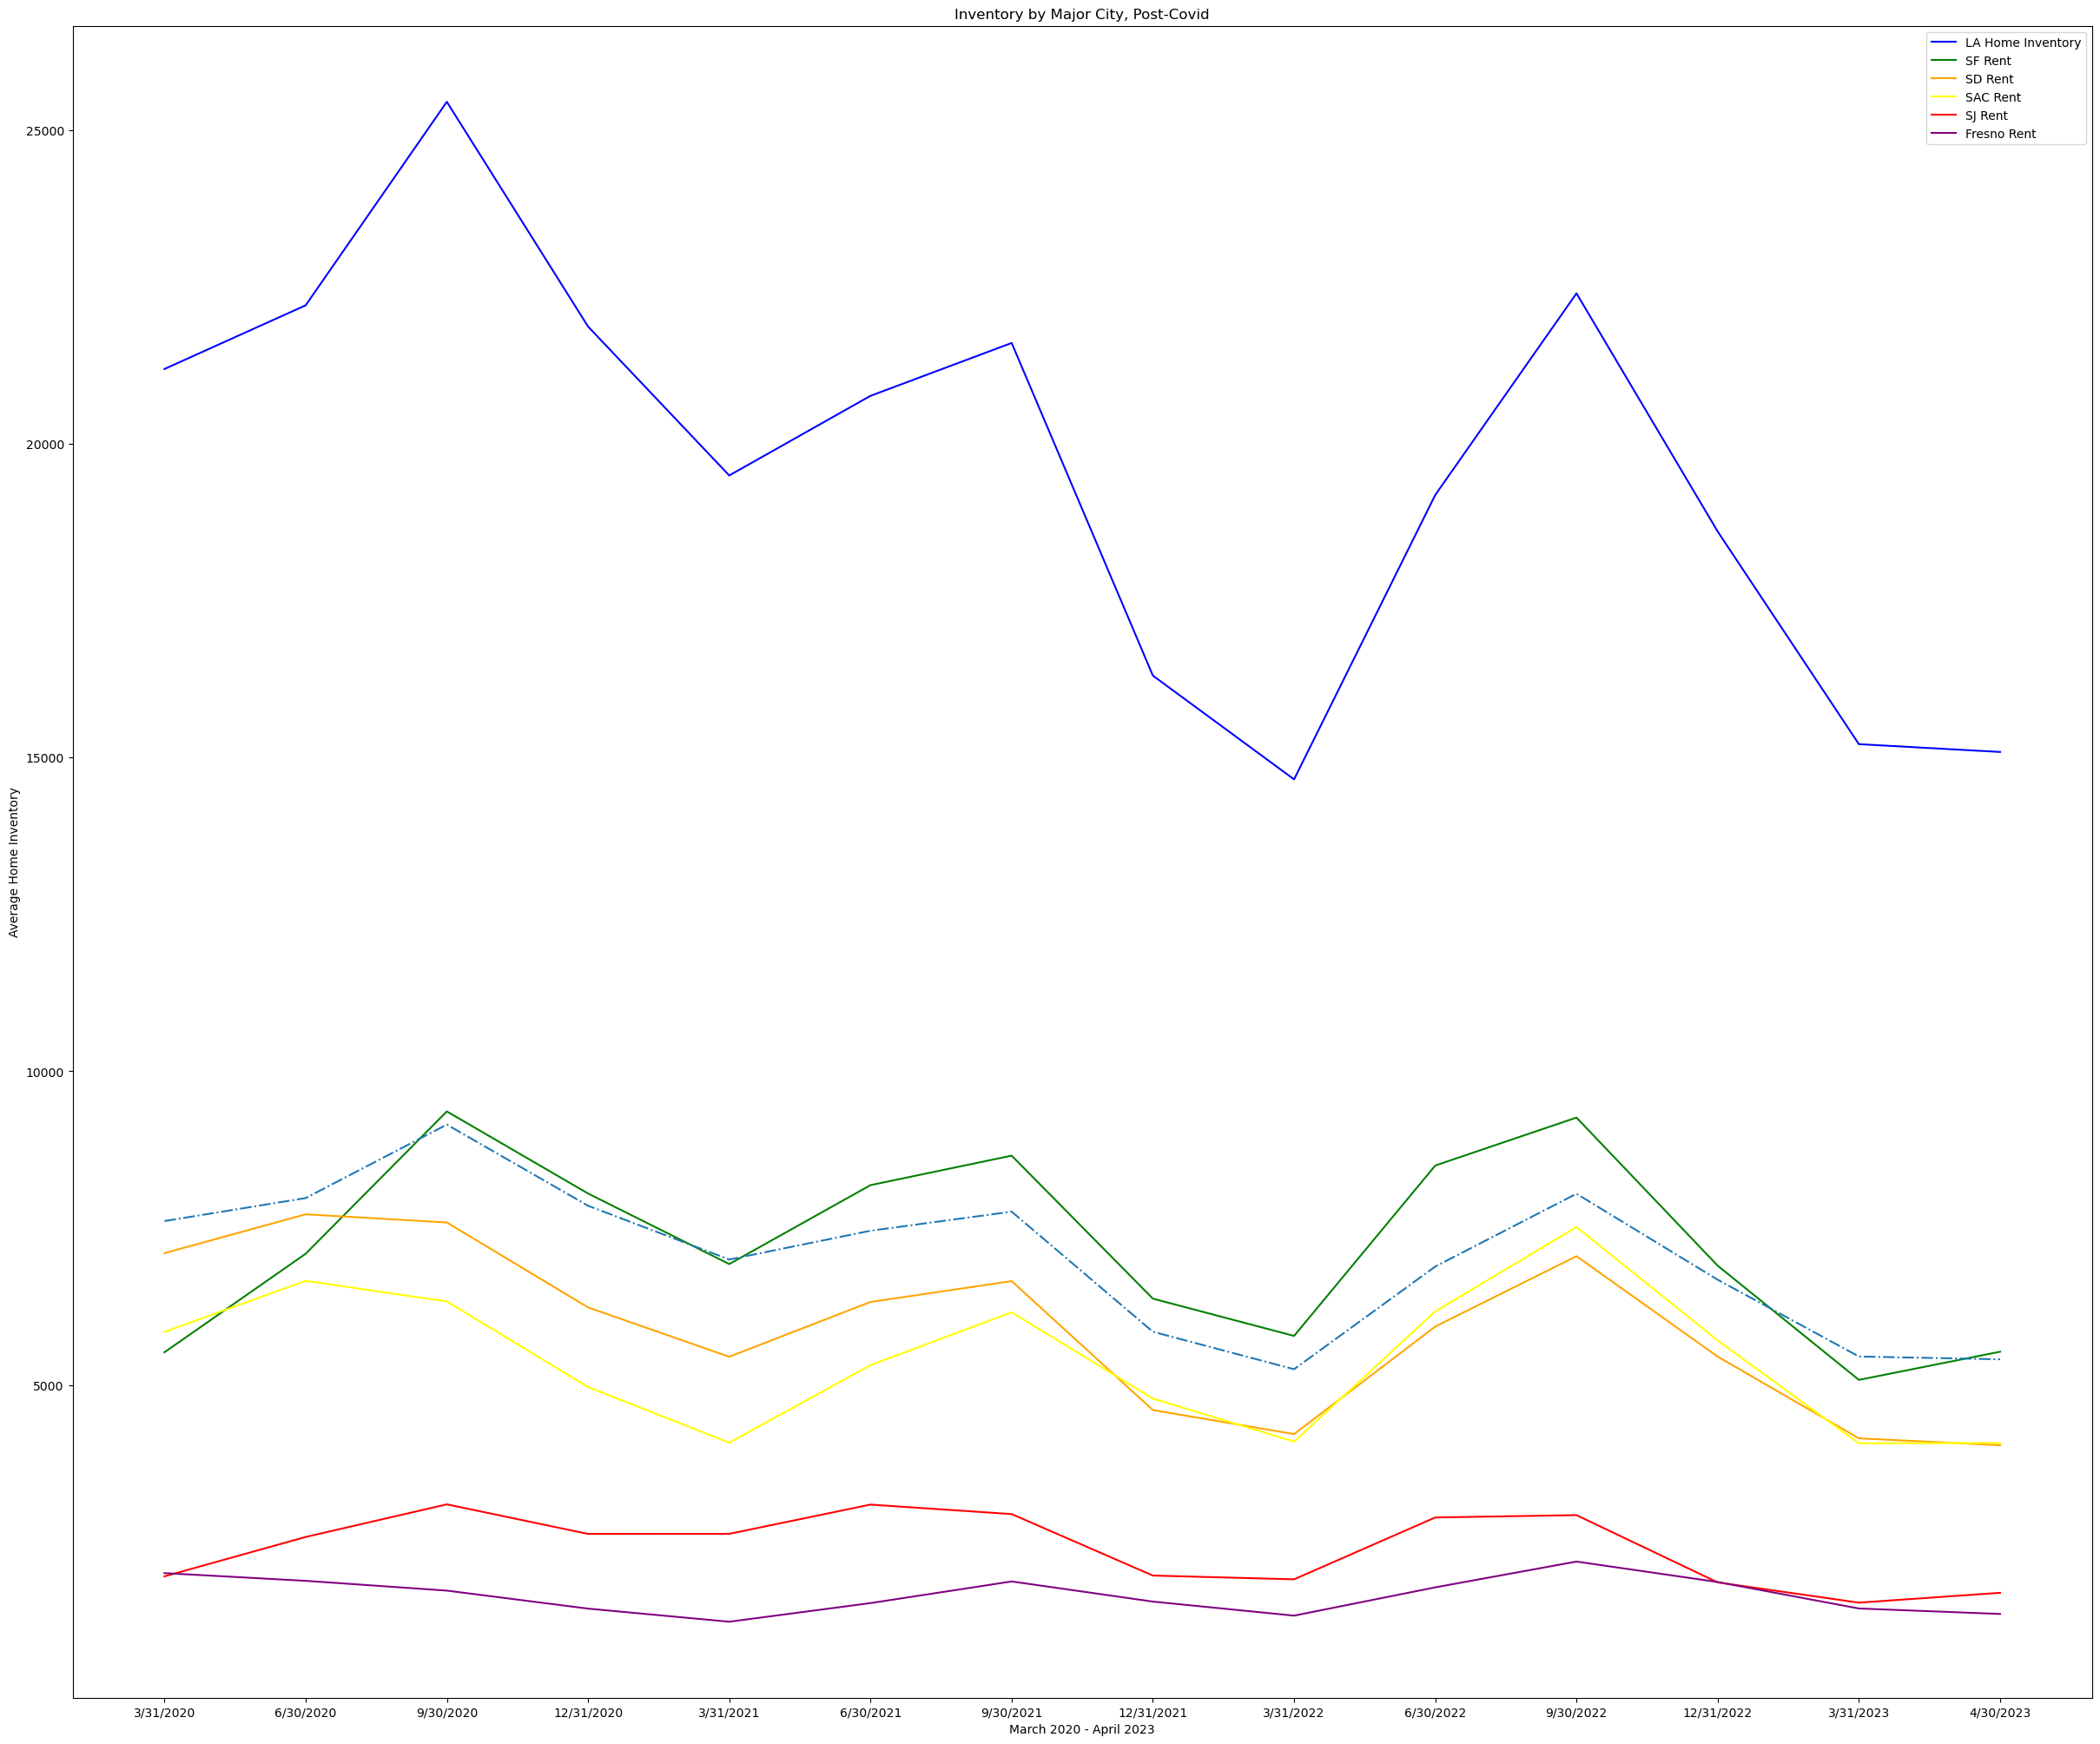

Regression Line Equation: y = 0.36x + -39.28
Correlation Coefficient: 0.9716590322311915


In [87]:
LA=post_covid.loc[2]
SF=post_covid.loc[12]
SD=post_covid.loc[17]
SAC=post_covid.loc[26]
SJ=post_covid.loc[35]
FRS=post_covid.loc[56]
plt.figure(figsize=(30,25))
LA_avg=plt.plot(post_months, LA, color='blue', label="LA Home Inventory")
SF_avg=plt.plot(post_months, SF, color="green", label="SF Rent")
SD_avg=plt.plot(post_months, SD, color='orange', label="SD Rent")
SAC_avg=plt.plot(post_months, SAC, color='yellow', label="SAC Rent")
SJ_avg=plt.plot(post_months, SJ, color='red', label="SJ Rent")
FRS_avg=plt.plot(post_months, FRS, color='purple', label='Fresno Rent')
plt.legend()
plt.title("Inventory by Major City, Post-Covid")
plt.xlabel("March 2020 - April 2023")
plt.ylabel("Average Home Inventory")

regression_months= post_covid.iloc[0,0:]
slope, intercept, r_value, p_value, std_err = linregress(regression_months, average_home_post)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(3400,2783.92),fontsize=15,color="red")

regression_line = slope * regression_months + intercept
plt.plot(regression_line, linestyle='dashdot', label='Regression Line')

plt.show()
print("Regression Line Equation: y = {:.2f}x + {:.2f}".format(slope, intercept))
print("Correlation Coefficient:", r_value)

In [26]:
file2= Path("data/Rental data. monthly.csv")
rental_df=pd.read_csv(file2)

In [27]:
rental_df.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
0,102001,0,United States,country,NaN,1316.882137,1327.077746,1336.985344,1347.189723,1353.394167,...,1987.491300,2002.482563,2008.140297,2006.081681,1997.638718,1992.421079,1991.266756,1997.228610,2006.354216,2018.055353
1,394913,1,"New York, NY",msa,NY,2443.764214,2464.719370,2483.196870,2500.971887,2512.718350,...,3207.491920,3233.573512,3231.414682,3207.885431,3175.252087,3151.638239,3143.696116,3159.468131,3188.554355,3229.346478
2,753899,2,"Los Angeles, CA",msa,CA,1921.951938,1935.567889,1948.902894,1961.209437,1978.339689,...,2916.787977,2931.511579,2939.060199,2934.669745,2926.508092,2918.427897,2913.352030,2916.907462,2926.201136,2940.362187


In [30]:
ca_rental=pd.DataFrame(rental_df.loc[[2,12,17,26,35,56]])

ca_rental.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,753899,2,"Los Angeles, CA",msa,CA,1921.951938,1935.567889,1948.902894,1961.209437,1978.339689,...,2916.787977,2931.511579,2939.060199,2934.669745,2926.508092,2918.427897,2913.352030,2916.907462,2926.201136,2940.362187
12,395057,12,"San Francisco, CA",msa,CA,2378.542329,2404.115293,2436.319434,2472.506281,2504.773834,...,3137.819039,3150.576564,3147.162173,3134.211505,3112.309697,3098.350285,3089.845933,3097.124206,3111.439067,3121.825352
17,395056,17,"San Diego, CA",msa,CA,1784.219078,1794.202840,1799.577967,1809.206980,1820.488401,...,2988.681345,3025.094847,3033.909900,3028.264858,3000.917553,2981.183899,2966.022672,2975.253185,3000.873507,3039.548454
26,395045,26,"Sacramento, CA",msa,CA,1315.287612,1325.346620,1335.416623,1344.048533,1353.416736,...,2287.723162,2288.902132,2221.384225,2216.070830,2204.684147,2208.811974,2203.997743,2217.122467,2278.418341,2283.740342
35,395059,36,"San Jose, CA",msa,CA,2563.996918,2603.308738,2639.926279,2699.353871,2736.825818,...,3319.315130,3347.891315,3344.996611,3312.672031,3275.904726,3252.800868,3258.281763,3265.527581,3278.880383,3289.086180


In [31]:
clean_ca_rental=ca_rental
clean_ca_rental.head(1)

,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023
2,753899,2,"Los Angeles, CA",msa,CA,1921.951938,1935.567889,1948.902894,1961.209437,1978.339689,...,2916.787977,2931.511579,2939.060199,2934.669745,2926.508092,2918.427897,2913.35203,2916.907462,2926.201136,2940.362187


In [32]:
pre_covid_rental=clean_ca_rental[["RegionName","3/31/2018", "4/30/2018", "5/31/2018", "6/30/2018", "7/31/2018", "8/31/2018",
                                "9/30/2018", "10/31/2018", "11/30/2018", "12/31/2018", "1/31/2019", "2/28/2019","3/31/2019", 
                                 "4/30/2019", "5/31/2019", "6/30/2019", "7/31/2019", "8/31/2019",
                                "9/30/2019", "10/31/2019", "11/30/2019", "12/31/2019","1/31/2020", "2/29/2020" ]]
pre_covid_rental.head(6)

,RegionName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,...,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020
2,"Los Angeles, CA",2265.071477,2276.676955,2288.427117,2301.231310,2312.264725,2323.716003,2329.296317,2334.353659,2337.549128,...,2380.474597,2392.559226,2401.944828,2411.817383,2416.708434,2418.543444,2417.619003,2422.459078,2429.216103,2436.961969
12,"San Francisco, CA",2767.353978,2781.349167,2800.843444,2819.242098,2836.120929,2848.262070,2850.498838,2850.957712,2848.915816,...,2897.615928,2916.209930,2932.738188,2940.624090,2937.329860,2926.584159,2920.810631,2917.894432,2931.222753,2942.477676
17,"San Diego, CA",2090.860344,2102.433897,2117.913519,2129.712935,2143.080904,2152.923843,2159.776617,2159.595748,2157.892771,...,2197.149834,2208.442849,2217.948512,2228.157839,2233.655913,2239.509124,2237.725713,2235.111403,2235.541581,2243.253166
26,"Sacramento, CA",1649.483432,1661.970396,1677.256837,1693.815112,1706.670904,1719.131902,1717.861411,1719.468423,1715.153647,...,1764.780631,1776.720946,1787.499698,1795.482017,1796.274252,1797.224298,1796.694544,1786.763346,1786.641003,1792.625845
35,"San Jose, CA",2909.379675,2932.553963,2957.897205,2981.054308,2998.112925,3007.236401,3006.852064,2997.131505,2982.476142,...,3029.590066,3046.530586,3064.392401,3078.020646,3073.149942,3058.634096,3043.084884,3041.268943,3053.406767,3068.614556
56,"Fresno, CA",1332.962656,1346.061760,1355.973138,1358.253124,1370.248281,1374.195666,1383.827651,1392.982327,1395.243769,...,1437.400850,1446.425936,1457.290543,1467.291284,1476.453647,1479.085673,1485.491306,1492.989177,1507.636354,1515.170889


In [33]:
pre_covid_rentals=clean_ca_rental[["3/31/2018", "6/30/2018",
                                "9/30/2018", "12/31/2018","3/31/2019", 
                                  "6/30/2019",
                                "9/30/2019", "12/31/2019", "2/29/2020" ]]


In [34]:
pre_rent_months=pre_covid_rentals.keys()


In [35]:
average_rent_pre=pre_covid_rentals[["3/31/2018", "6/30/2018",
                                "9/30/2018", "12/31/2018","3/31/2019", 
                                  "6/30/2019",
                                "9/30/2019", "12/31/2019", "2/29/2020" ]].mean()


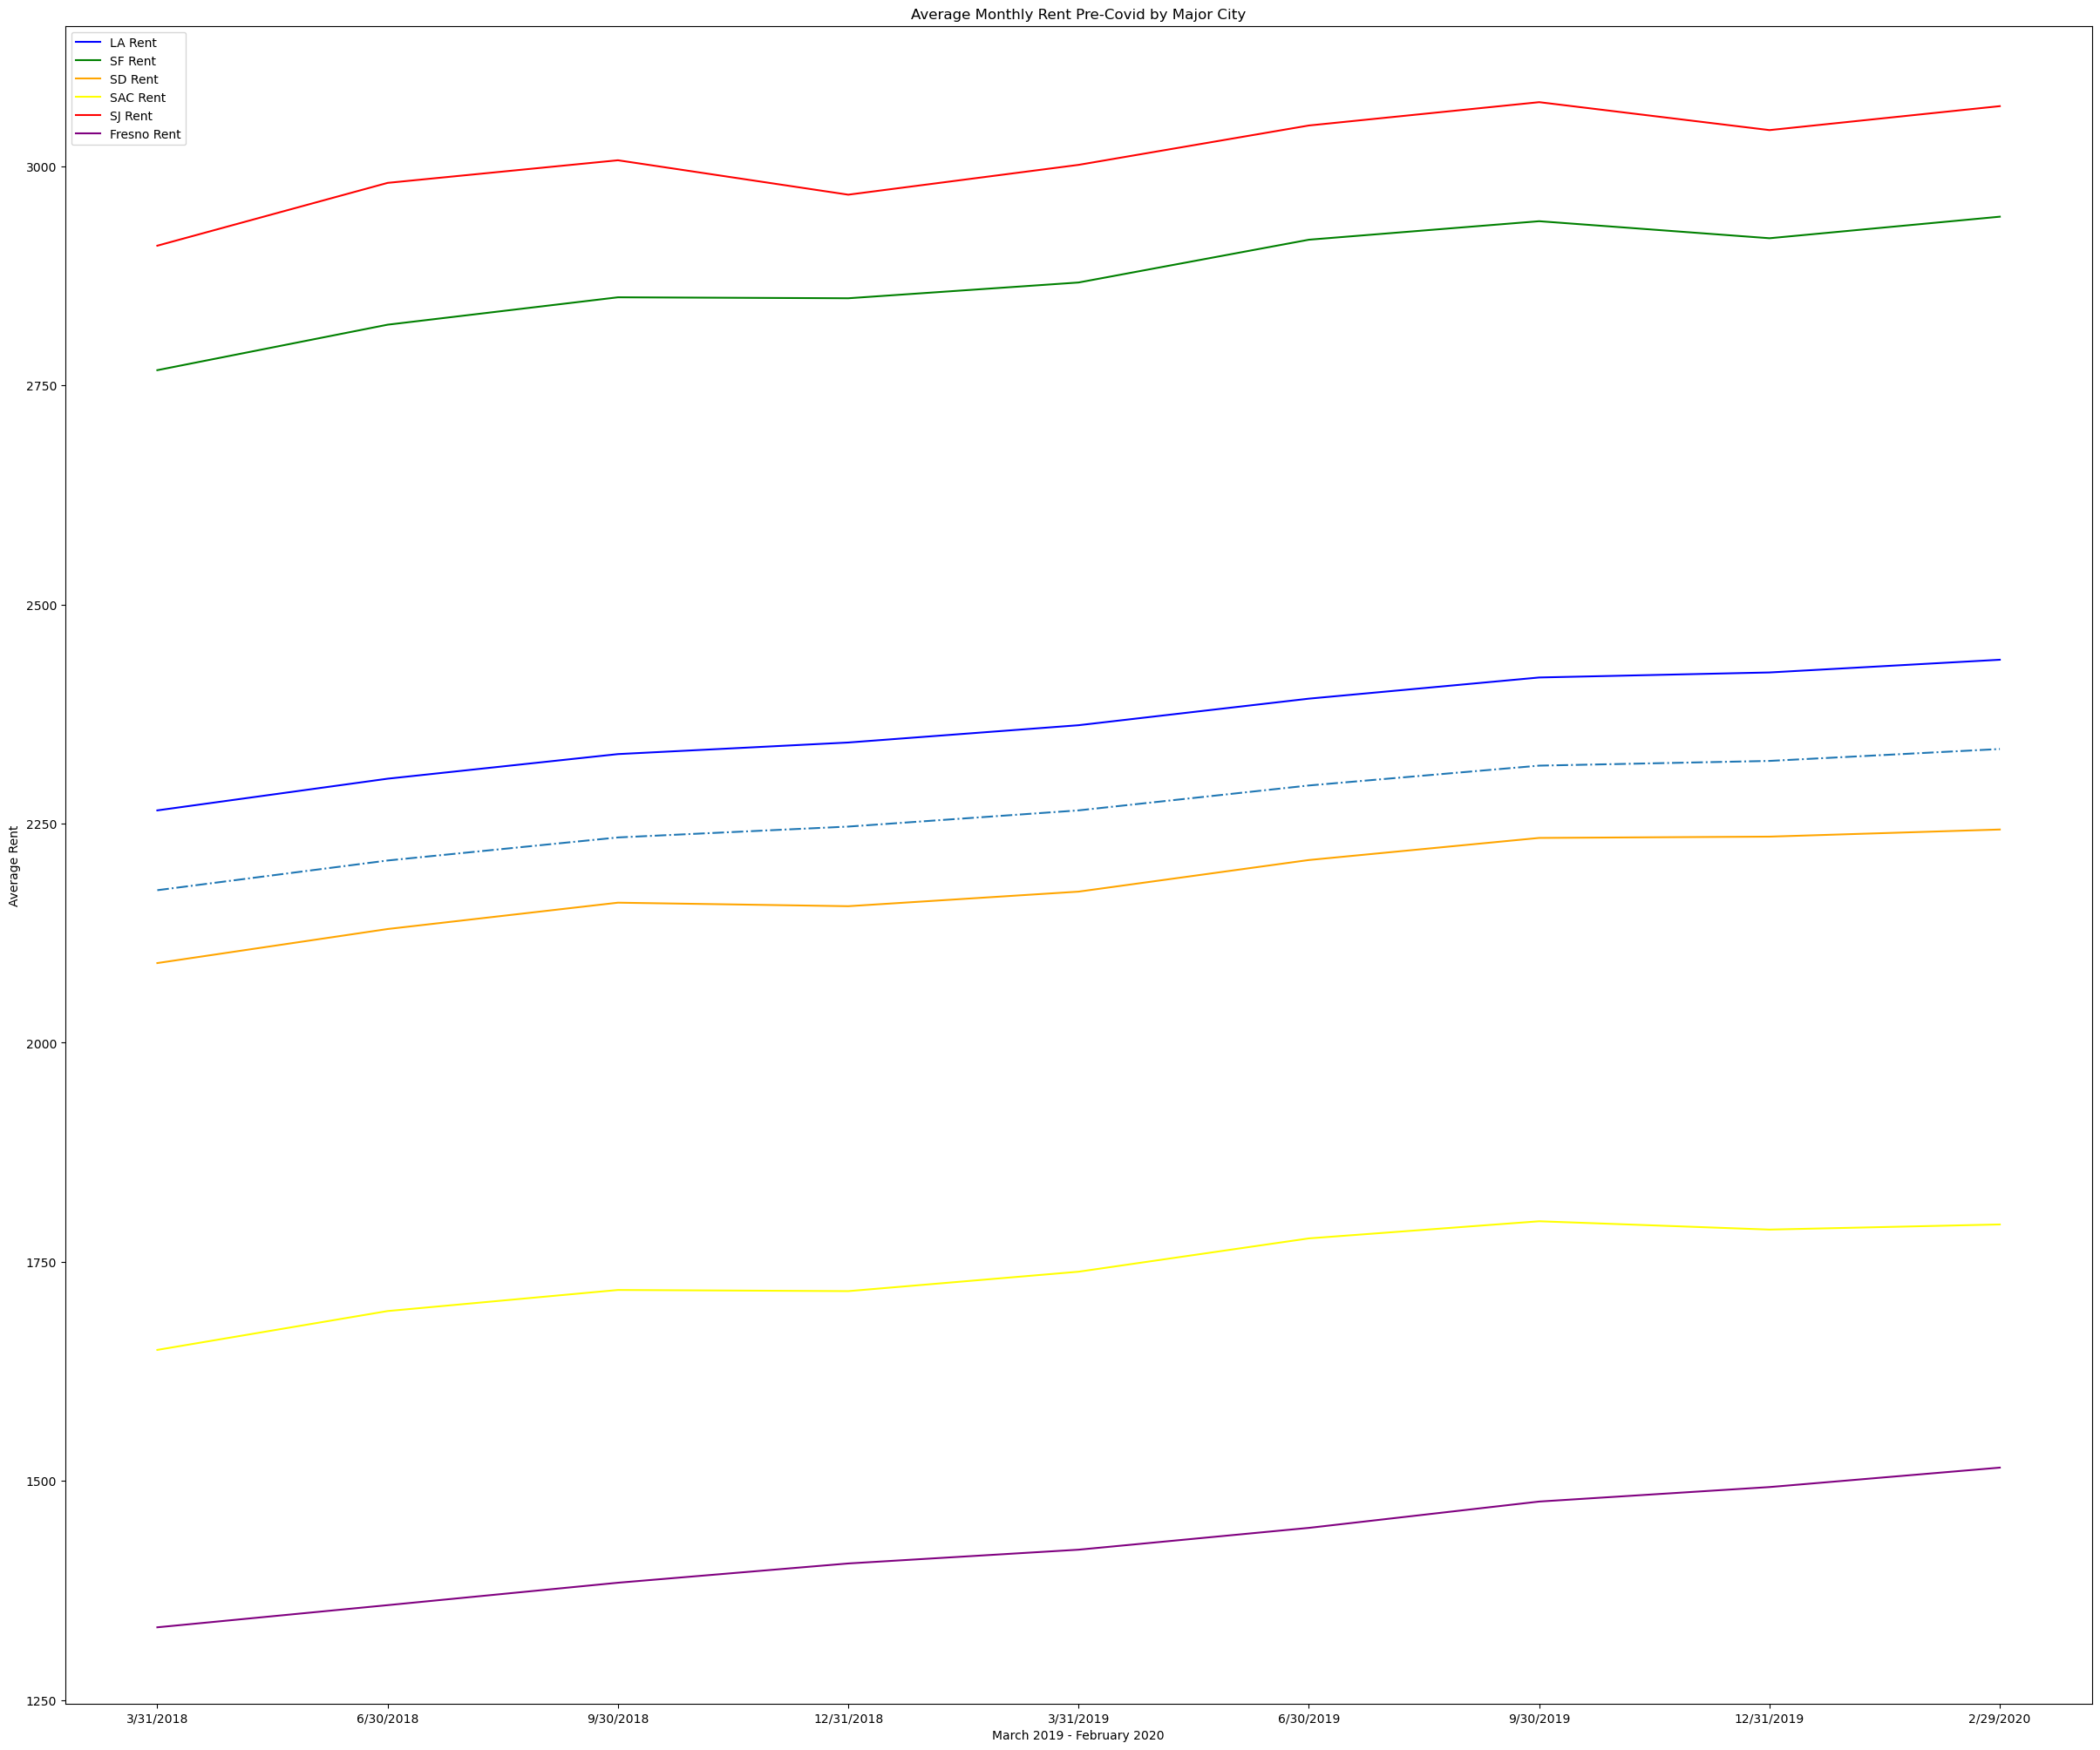

Regression Line Equation: y = 0.94x + 51.13
Correlation Coefficient: 0.9945337017579858


In [86]:
LA=pre_covid_rentals.loc[2]
SF=pre_covid_rentals.loc[12]
SD=pre_covid_rentals.loc[17]
SAC=pre_covid_rentals.loc[26]
SJ=pre_covid_rentals.loc[35]
FRS=pre_covid_rentals.loc[56]
plt.figure(figsize=(30,25))
LA_avg=plt.plot(pre_rent_months, LA, color='blue', label="LA Rent")
SF_avg=plt.plot(pre_rent_months, SF, color="green", label="SF Rent")
SD_avg=plt.plot(pre_rent_months, SD, color='orange', label="SD Rent")
SAC_avg=plt.plot(pre_rent_months, SAC, color='yellow', label="SAC Rent")
SJ_avg=plt.plot(pre_rent_months, SJ, color='red', label="SJ Rent")
FRS_abg=plt.plot(pre_rent_months, FRS, color="purple", label="Fresno Rent")
plt.legend()
plt.title("Average Monthly Rent Pre-Covid by Major City")
plt.xlabel("March 2019 - February 2020")
plt.ylabel("Average Rent")

regression_months=pre_covid_rentals.iloc[0,0:]

slope, intercept, r_value, p_value, std_err = linregress(regression_months, average_rent_pre)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(3400,2783.92),fontsize=15,color="red")

regression_line = slope * regression_months + intercept
plt.plot(regression_line, linestyle='dashdot', label='Regression Line')

plt.show()
print("Regression Line Equation: y = {:.2f}x + {:.2f}".format(slope, intercept))
print("Correlation Coefficient:", r_value)

In [74]:
post_covid_rental=clean_ca_rental[["RegionName","3/31/2020", "4/30/2020", "5/31/2020", "6/30/2020", "7/31/2020", "8/31/2020",
                                "9/30/2020", "10/31/2020", "11/30/2020", "12/31/2020", "1/31/2021", "2/28/2021","3/31/2021", 
                                 "4/30/2021", "5/31/2021", "6/30/2021", "7/31/2021", "8/31/2021",
                                "9/30/2021", "10/31/2021", "11/30/2021", "12/31/2021","1/31/2022", "2/28/2022",
                                 "3/31/2022", "4/30/2022", "5/31/2022", "6/30/2022", "7/31/2022", "8/31/2022",
                                "9/30/2022", "10/31/2022", "11/30/2022", "12/31/2022","1/31/2023", "2/28/2023",
                                 "3/31/2023", "4/30/2023" ]]
post_covid_rental.head(0)

,RegionName,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,...,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023


In [76]:
post_covid_rentals=clean_ca_rental[["3/31/2020", "6/30/2020",
                                "10/31/2020", "12/31/2020","3/31/2021", 
                                  "6/30/2021",
                                "9/30/2021", "12/31/2021",
                                 "3/31/2022", "6/30/2022",
                                "9/30/2022",  "12/31/2022",
                                 "3/31/2023", "4/30/2023" ]]
post_covid_rentals.head()

,3/31/2020,6/30/2020,10/31/2020,12/31/2020,3/31/2021,6/30/2021,9/30/2021,12/31/2021,3/31/2022,6/30/2022,9/30/2022,12/31/2022,3/31/2023,4/30/2023
2,2437.138360,2387.710691,2391.319141,2399.822633,2419.904232,2504.650324,2660.652851,2733.626302,2802.062323,2893.926879,2939.060199,2918.427897,2926.201136,2940.362187
12,2949.651850,2908.052281,2732.149796,2693.068370,2728.540978,2842.457127,2962.327288,2969.116855,3030.387152,3112.380214,3147.162173,3098.350285,3111.439067,3121.825352
17,2253.894424,2228.138757,2282.246451,2309.211432,2342.213898,2466.883429,2642.023429,2729.693319,2794.521421,2946.905717,3033.909900,2981.183899,3000.873507,3039.548454
26,1807.858790,1816.929249,1892.855683,1910.182477,1945.076134,2060.673908,2183.946151,2163.881914,2197.354867,2266.274411,2221.384225,2208.811974,2278.418341,2283.740342
35,3085.726841,3011.303266,2857.430104,2799.839684,2808.928973,2927.094312,3054.990504,3049.843668,3134.210093,3271.446120,3344.996611,3252.800868,3278.880383,3289.086180


In [77]:
months=post_covid_rentals.keys()


In [78]:
average_rent_post= post_covid_rentals[["3/31/2020", "6/30/2020",
                                "10/31/2020", "12/31/2020","3/31/2021", 
                                  "6/30/2021",
                                "9/30/2021", "12/31/2021",
                                 "3/31/2022", "6/30/2022",
                                "9/30/2022",  "12/31/2022",
                                 "3/31/2023", "4/30/2023" ]].mean()


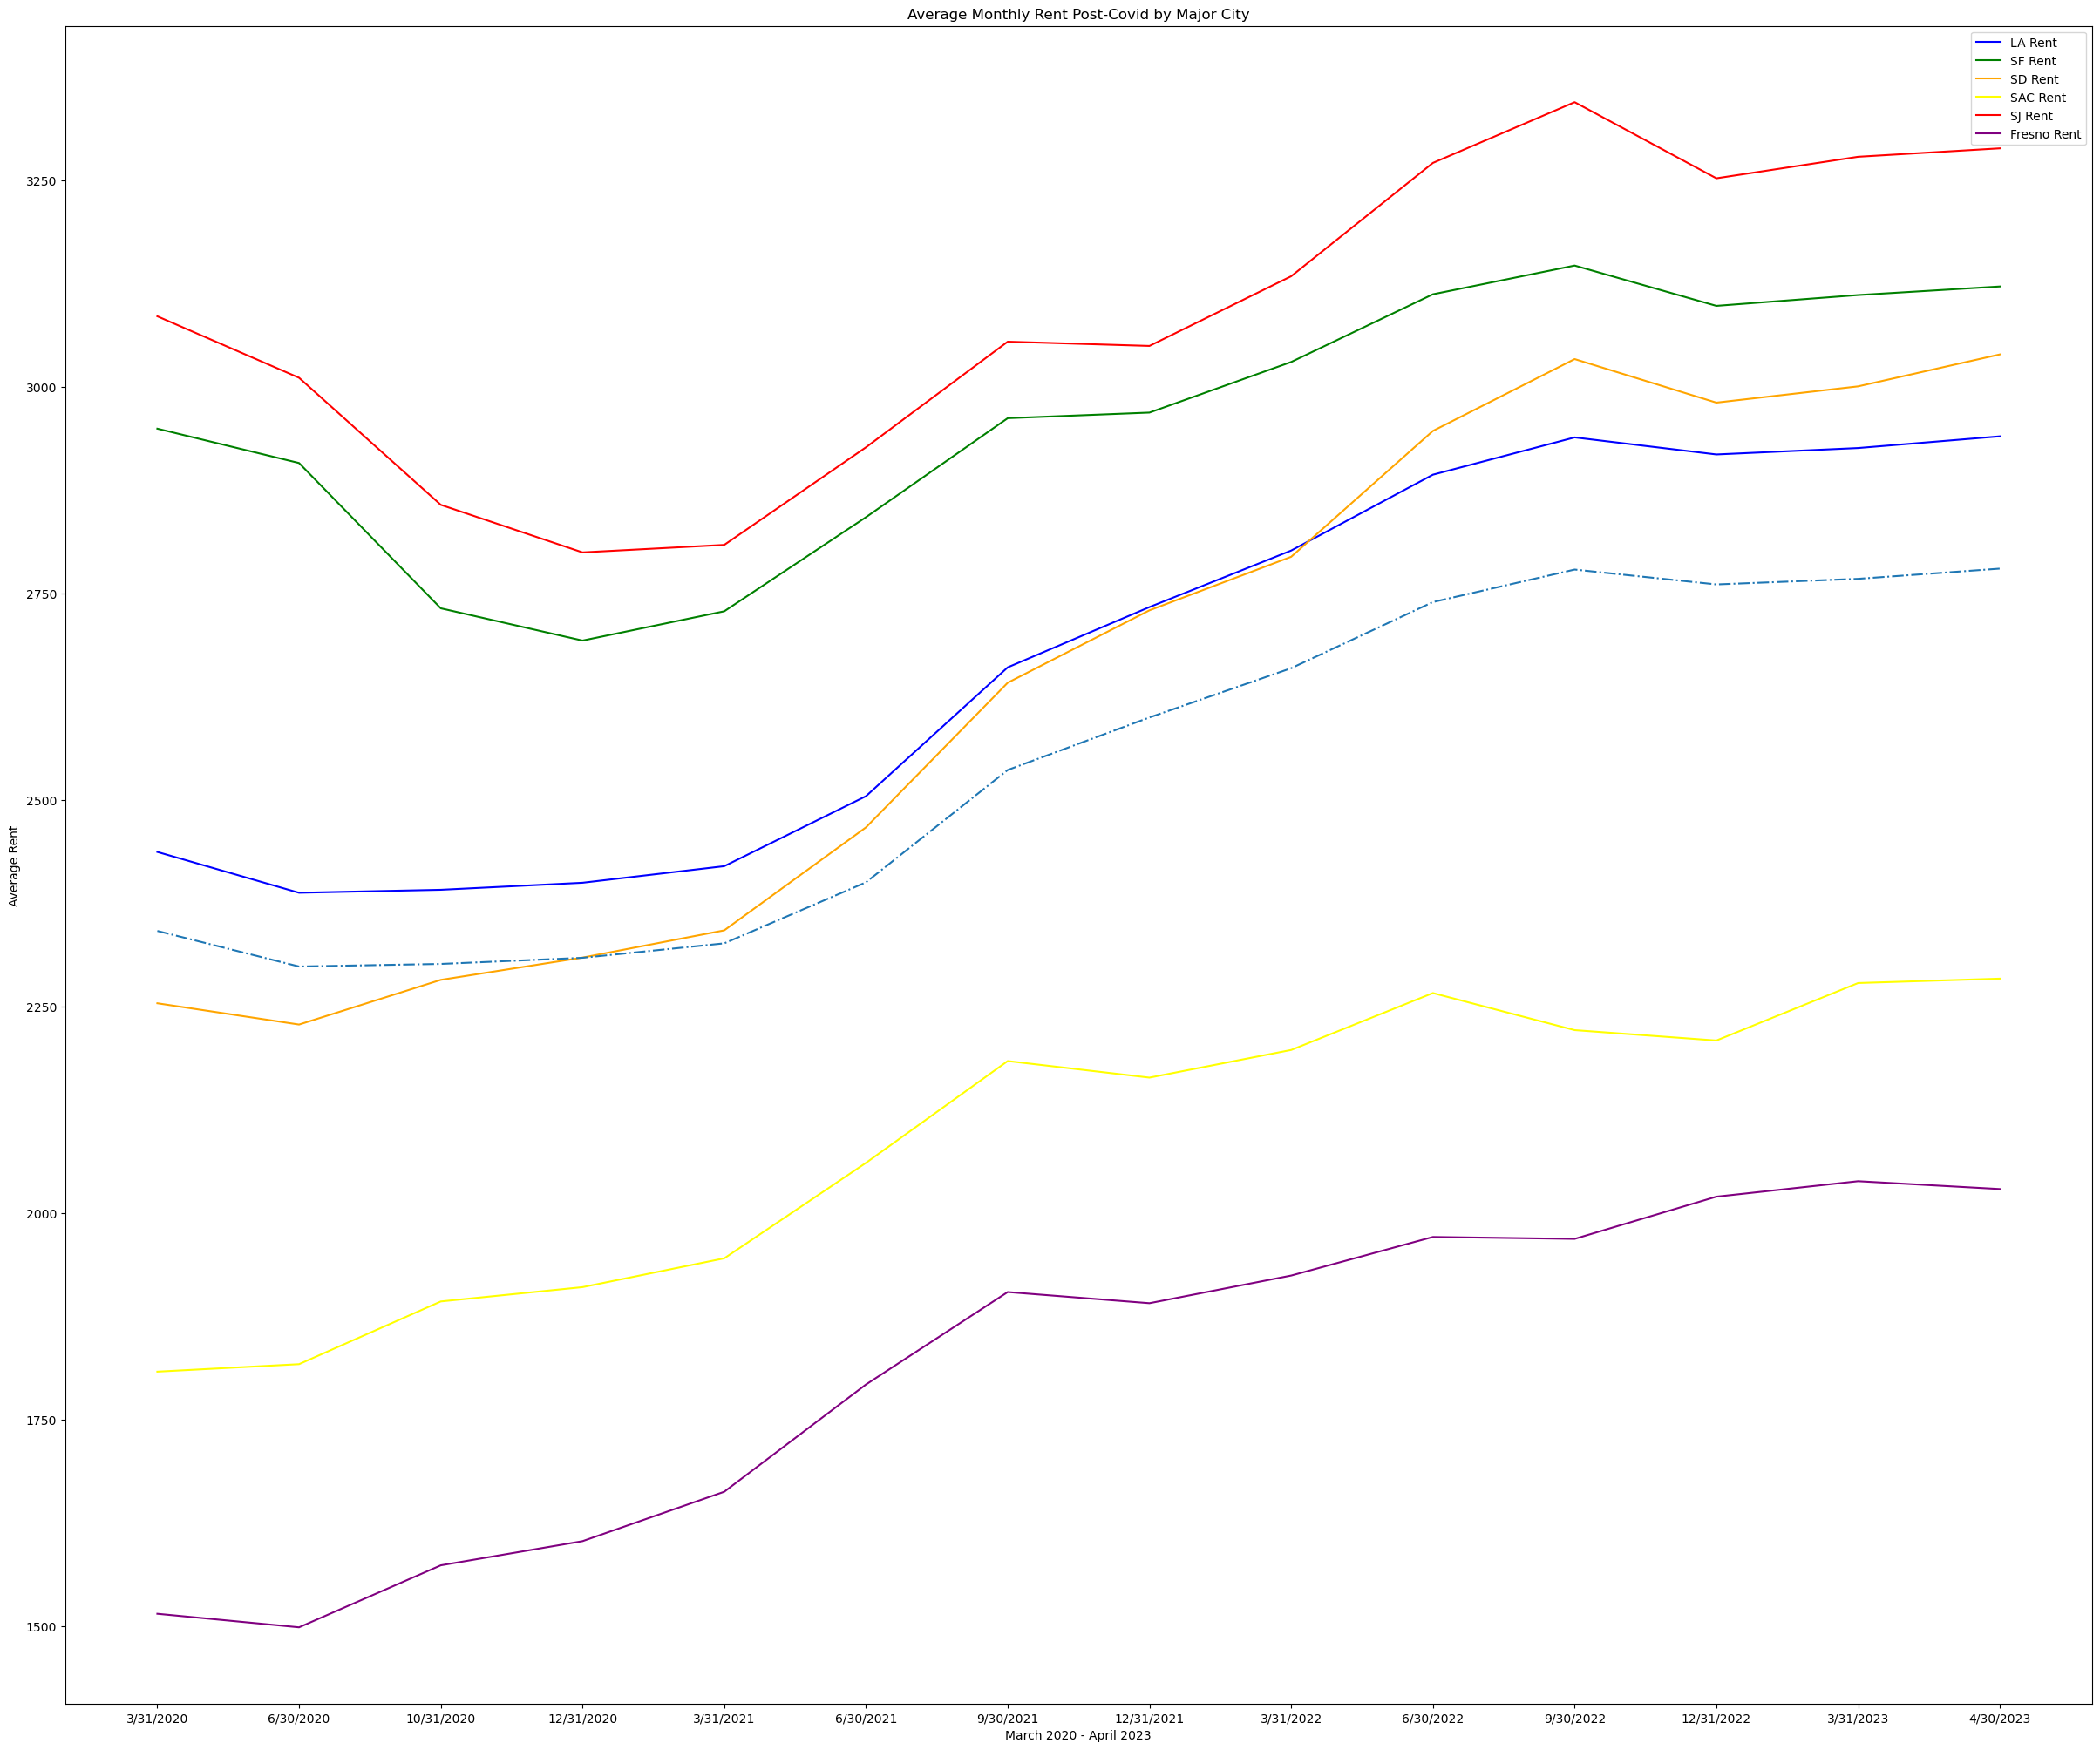

Regression Line Equation: y = 0.87x + 216.92
Correlation Coefficient: 0.9968546639072579


In [85]:
LA=post_covid_rentals.loc[2]
SF=post_covid_rentals.loc[12]
SD=post_covid_rentals.loc[17]
SAC=post_covid_rentals.loc[26]
SJ=post_covid_rentals.loc[35]
FRS=post_covid_rentals.loc[56]
plt.figure(figsize=(30,25))
LA_avg=plt.plot(months, LA, color='blue', label="LA Rent")
SF_avg=plt.plot(months, SF, color="green", label="SF Rent")
SD_avg=plt.plot(months, SD, color='orange', label="SD Rent")
SAC_avg=plt.plot(months, SAC, color='yellow', label="SAC Rent")
SJ_avg=plt.plot(months, SJ, color='red', label="SJ Rent")
FRS_avg=plt.plot(months, FRS, color='purple', label='Fresno Rent')
plt.legend()
plt.title("Average Monthly Rent Post-Covid by Major City")
plt.xlabel("March 2020 - April 2023")
plt.ylabel("Average Rent")

regression_months= post_covid_rentals.iloc[0,0:]

slope, intercept, r_value, p_value, std_err = linregress(regression_months, average_rent_post)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(3400,2783.92),fontsize=15,color="red")

regression_line = slope * regression_months + intercept
plt.plot(regression_line, linestyle='dashdot', label='Regression Line')

plt.show()
print("Regression Line Equation: y = {:.2f}x + {:.2f}".format(slope, intercept))
print("Correlation Coefficient:", r_value)